# Telecom Churn Prediction
<hr>

<img src='https://www.superoffice.com/blog/wp-content/uploads/2015/05/customer-churn-750x400.jpg'>

<div style='text-align:center;color:gray;font-size:10px'>Photo credit: <a link='https://www.superoffice.com/blog/reduce-customer-churn/'>Superoffice.com</a></div>

Customers are the most important resources for any companies or businesses. What if these customers leave the company due to high charges, better competitor offers, poor customer services or something unknown? Hence, Customer churn rate is one of the important metrics for companies to evaluate their performance.

Customer churn rate is a KPI to understand the leaving customers. Churn rate represents the percentage of customers that company
lost over all the customers at the beginning of the interval.

For example, If company had 400 customers at the beginning of the month and only 360 at the end of the month, means company’s churn rate is 10%, because company lost 10% of the customer base. Companies always try to minimize the churn rate to as close as 0%.



## Table of contents
***************************************

### 1) Introduction
- Dataset, features and target value
- Problem description

### 2) Descriptive analysis and EDA (Exploratory Data Analysis)
- Churn rate and Correlation between features
- Profile of Churn vs Existing customers
- tenure and Monthly charges distribution

### 3) Cluster analysis
- Churn cluster detection
- Churn customer cluster analysis – by Demographic, Account type and Service Usage

### 4) Churn customer prediction model
- Prediction model process
- Model evaluation

### 5) Retention plan


In [ ]:
__author__ = "Shivali Patel"
__email__ = "shivuptl@gmail.com"

## 1. Introduction
<hr>


### Dataset, Features and Target value
Source : https://www.kaggle.com/blastchar/telco-customer-churn ( IBM Sample dataset)

Here, IBM provided customer data for Telecom industry to predict churn customer based on demographic, usage and account based information. Main objective here is to analyze churn customers’ behavior and develop strategies to increase customer retention.
Assumption — Here, data source has not provided any information related to time; So I have assumed that all the records are specific to the particular month.

Dataset has information related to,

#### Demographic:

- gender - Male / Female <br>
- Age range - In terms of Partner, Dependent and Senior Citizen

#### Services:

- Phone service - If customer has Phone service, then services related to Phone like;
    - Multiline Phone service
- Internet Service - If customer has Internet service, then services related to Internet like;
    - Online security
    - Online backup
    - Device protection
    - Tech support
    - Streaming TV
    - Streaming Movies

#### Account type:

- tenure - How long customer is with the company?
- Contract type - What kind of contract they have with a company? Like
    - Monthly bases
    - On going bases - If on going bases, then One month contract or Two year contract
- Paperless billing - Customer is paperless billion option or not?
- Payment method - What kind of payment method customer has?
    - Mailed check
    - Electronic check
    - Credit card (Automatic)
    - Bank transfer (Automatic)

#### Usage:

- Monthly charges
- Total charges

#### Target:

- Churn - Whether customer left the company or still with the company?

### Problem Description

#### Why customers leaving the company?
The reasons behind the customer leaving company could be
- High charges
- Better offer from competitor
- Poor customer service
- Some unknown reasons

#### How to detect the churn customer?
- Monitoring usage
- Analysing complains
- Analyzing competitors offers

#### How to prevent customers from leaving a company?
Once you detect high risk customers, apply
- Retention plans
- Improve customer service


## 2. Descriptive analysis and EDA (Exploratory Data Analysis)
<hr>

Here, I have explored data, features and tried to have some intuition about them.


### Load libraries and dataset

In [ ]:
!pip install adjustText


In [ ]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from adjustText import adjust_text
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

#set up
sns.set(style='whitegrid')
%matplotlib inline

In [ ]:
# Create Data class which has load_data method
class Data:
    def __init__(self):
        print("Data object initiated")

    def Load_data(self,filepath,format='csv'):
        """ Read data from file and return data """
        if format == 'csv':
            return pd.read_csv(filepath)
        elif format == 'xlsx':
            return pd.read_excel(filepath)

In [ ]:
data_file = '/content/WA_Fn-UseC_-Telco-Customer-Churn - Copy (2).csv'
extension = 'csv'

data = Data()
df_raw = data.Load_data(data_file, extension)
df_raw.head(10)

Data object initiated


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df_raw.loc[df_raw["MultipleLines"] == "No phone service", "MultipleLines"] = 'No'
df_raw.loc[df_raw["OnlineSecurity"] == "No internet service", "OnlineSecurity"] = 'No'
df_raw.loc[df_raw["OnlineBackup"] == "No internet service", "OnlineBackup"] = 'No'
df_raw.loc[df_raw["DeviceProtection"] == "No internet service", "DeviceProtection"] = 'No'
df_raw.loc[df_raw["TechSupport"] == "No internet service", "TechSupport"] = 'No'
df_raw.loc[df_raw["StreamingTV"] == "No internet service", "StreamingTV"] = 'No'
df_raw.loc[df_raw["StreamingMovies"] == "No internet service", "StreamingMovies"] = 'No'
df_raw.loc[df_raw["DeviceProtection"] == "No internet service", "DeviceProtection"] = 'No'
df_raw.loc[df_raw["TotalCharges"] == " ", "TotalCharges"] = '0'
df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'])

### Dimensionality & Sanity check

In [ ]:
df_raw.shape

(7043, 21)

Dataset has **7043 observations** and **21 features**

In [ ]:
# feature exploration

df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Checking missing / NULL values

df_raw.isnull().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
# Duplicate value check

df_raw.duplicated().any()

np.False_

In [ ]:
# Exploring data types of each feature

df_raw.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


We need to rename columns into proper format and need to transform columns like Partner, Dependents and so on to similar format for furture analysis.

Also, need to change data type of TotalCharges to float.

### Data transformation & Renaming

Here, we are going to rename some columns as well as modifying records with proper format for further analysis.

In [ ]:
# Encoder = "Label Encoder"
Encoder = "Label Encoder"
# OverSamplingTecnique = ""
OverSamplingTecnique = "SMOTE-Enn"
# OverSamplingTecnique = "SMOTE-Tomek"
# OverSamplingTecnique = "SMOTE-Enn"
filter_size=5
number_of_filter=128
flatten_layer_exist=True
Model_Name="SE Block"

In [ ]:
def Data_transformation_renaming(df_raw):
    """ Rename column names and transformed into proper format and return dataframe """
    df_cal = df_raw.copy()

    df_cal.rename(columns={'gender':'gender'
                       ,'customerID':'customerID'
                       ,'Contract':'Contract'
                       ,'InternetService':'InternetService'
                       ,'tenure':'tenure'
                      }
              ,inplace=True)


    df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
    df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

    df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
    df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

    df_cal['InternetService'] = df_cal.InternetService.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
    df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

    # Data mining
    df_cal['IsContracted'] = df_cal.Contract.map({'One year':1,'Two year':1,'Month-to-month':0})

    # Data transformation

    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan

    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
    df_cal.loc[df_cal['TotalCharges'].isnull()==True,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['tenure']


    return df_cal

In [ ]:
import joblib

if Encoder == "Label Encoder":
  print("Applying Label Encoder")
  df_final = df_raw.copy()
  le = LabelEncoder()

  text_data_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn']

  print('Label Encoder Transformation')
  for i in text_data_features :
      df_final[i] = le.fit_transform(df_final[i])
      print(i,' : ',df_final[i].unique(),' = ',le.inverse_transform(df_final[i].unique()))
  # Lưu encoder
  joblib.dump(le, "label_encoder1.pkl")


  X = df_final.drop(['Churn','customerID'], axis=1).copy()
  Y = df_final['Churn'].copy().astype(int)

Applying Label Encoder
Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
SeniorCitizen  :  [0 1]  =  [0 1]
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [0 1]  =  ['No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]  =  ['No' 'Yes']
OnlineBackup  :  [1 0]  =  ['Yes' 'No']
DeviceProtection  :  [0 1]  =  ['No' 'Yes']
TechSupport  :  [0 1]  =  ['No' 'Yes']
StreamingTV  :  [0 1]  =  ['No' 'Yes']
StreamingMovies  :  [0 1]  =  ['No' 'Yes']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [ ]:
df_cal = df_final.copy()

df_cal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
cat_cols = ["gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetService","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies"
                    ,"Contract","PaperlessBilling","PaymentMethod"]


num_cols = ["tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['gender','InternetService','PaymentMethod','Contract']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService']

### Descriptive statistics

In [ ]:
df_cal[cat_cols].describe(include='all')

,gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.483033,0.299588,0.162147,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329
std,0.500013,0.499748,0.458110,0.368612,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


In [ ]:
df_cal[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Based on numerical columns descriptive analysis, average tenure, average monthly charges and total charges of subscriber is 32 months, 64 dollars and 2282 dollars, respectively.

In [ ]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

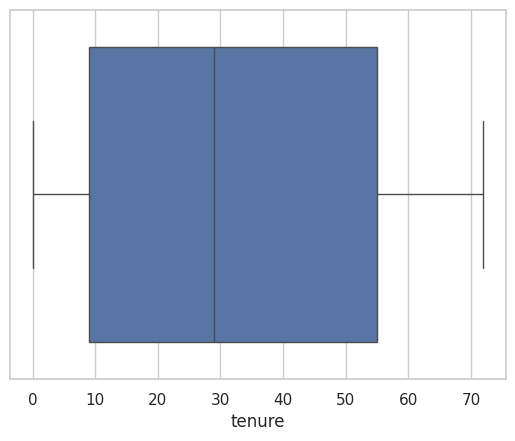

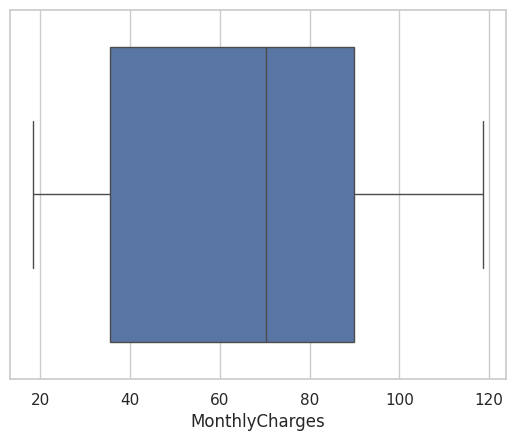

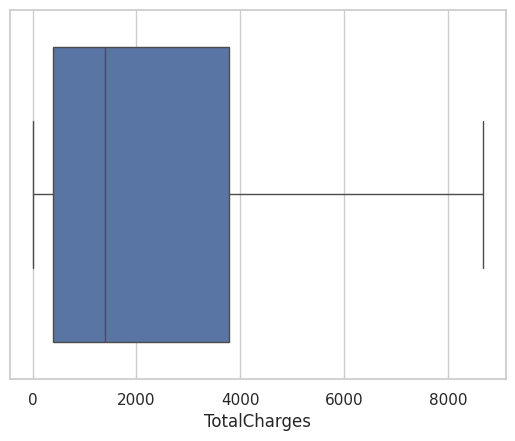

In [ ]:
for i in num_cols:
    Outlier_boxplot(df_cal,i)

Box plot graphs shows that none of the numerical columns have outliers.

In [ ]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title):
    """ Based on x and y value, generate bar graph with custom colors """

    # Gán màu theo nhãn
    colors = ['green' if label == 'Existing' else 'red' for label in x]

    fig, ax = plt.subplots()
    ax.bar(range(len(x)), y, width=0.75, color=colors, alpha=0.6)

    plt.xticks(range(len(x)), x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title, fontsize=13)
    plt.ylabel(y_title, fontsize=13)
    plt.grid(False)
    plt.yticks(fontsize=12)
    plt.ylim(top=1)

    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)

    for i, v in enumerate(y):
        ax.text(i, v + 0.05, str(round(v * 100, 2)) + '%', fontsize=13, ha='center')

    plt.show()



### Calculate Churn Rate

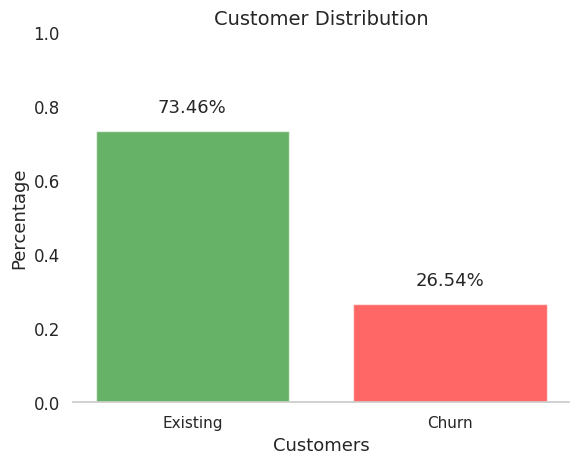

Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


In [ ]:
Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]

Generate_bar_graph(
    Churn_rate.index.map({0: 'Existing', 1: "Churn"}),
    Churn_rate.values,
    'Customers',
    'Percentage',
    'Customer Distribution'
)

print(Churn_rate)


**Churn rate of telecom company is around 26%**, Meaning around 26% of the subscribers left the company during given interval.

### Correlation

In [ ]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()


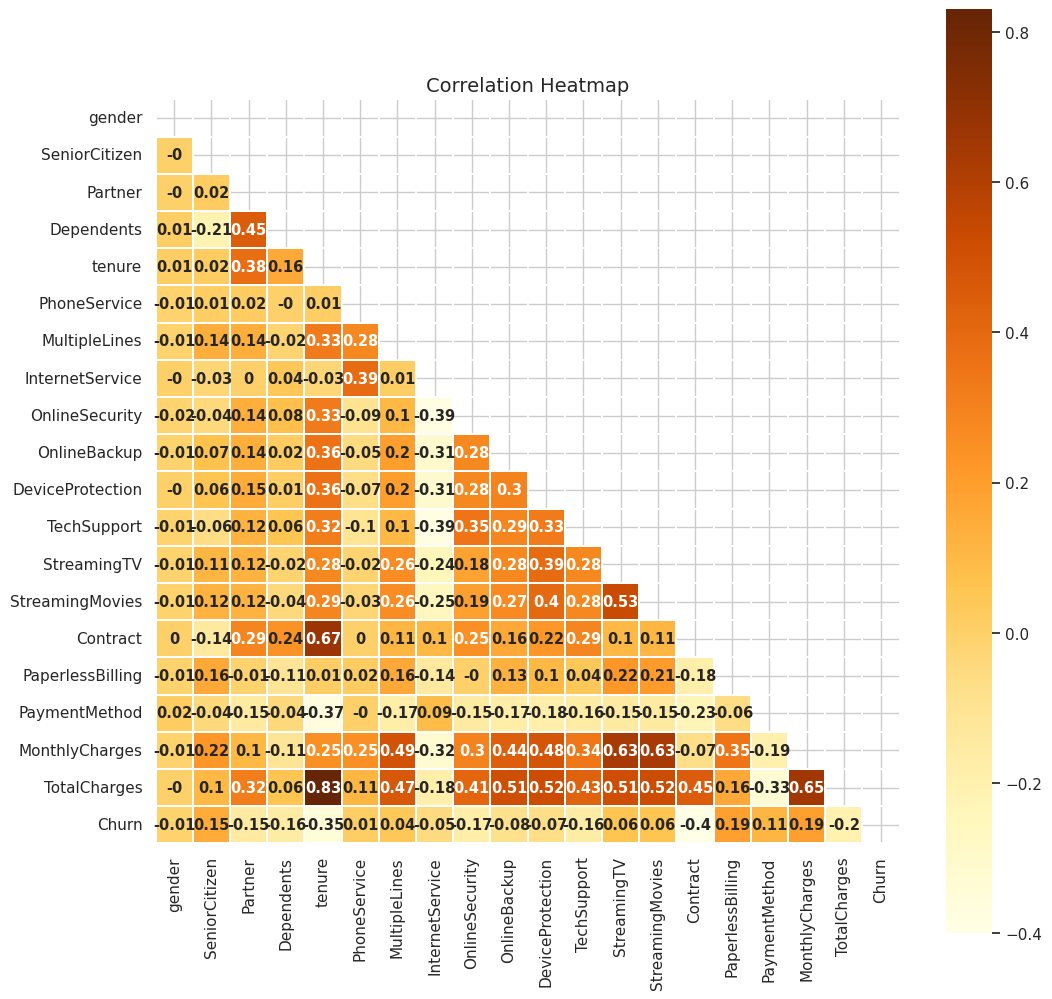

In [ ]:
# Chỉ giữ lại các cột kiểu số để tính correlation
df_numeric = df_cal.select_dtypes(include=['number'])

# Tính hệ số tương quan
var_corr = round(df_numeric.corr(), 2)

# Vẽ heatmap
Generate_heatmap_graph(
    var_corr,
    chart_title='Correlation Heatmap',
    mask_uppertri=True
)


From correlation matrix, features like **tenure, Monthly charges and Total charges** are **highly correlated with services** like MultipleLines of phone services and Internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and Streaming Movies services.

#### Distribution of tenure, Monthly Charges and Total Charges

Result shows that Churn customers have **more Monthly charges** compared to existing customers. <br>
Also, there is a drastic difference in **tenure** and **Total Charges** for Churn vs existing customers.

Let's check distribution of each features with target variable.

#### tenure vs Churn Distribution

In [ ]:
def Numerical_distribution(df_cal, feature):
    """Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(12, 9))

    # Plot 1: Phân phối gốc
    plt.subplot(2, 1, 1)
    sns.kdeplot(df_cal[feature], color='green', shade=True)
    plt.title("Original " + feature + " Distribution")

    # Plot 2: Phân phối theo Churn
    plt.subplot(2, 1, 2)
    sns.kdeplot(df_cal.loc[df_cal['Churn'] == 1, feature],
                color='#3399ff', shade=True, label='Churn')

    sns.kdeplot(df_cal.loc[df_cal['Churn'] == 0, feature],
                color='green', shade=True, label='No Churn')

    plt.title(feature + " Distribution: Churn vs No Churn")
    plt.legend()  # Hiển thị label
    plt.tight_layout()
    plt.show()



/tmp/ipython-input-59-3395063699.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal[feature], color='green', shade=True)
/tmp/ipython-input-59-3395063699.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal.loc[df_cal['Churn'] == 1, feature],
/tmp/ipython-input-59-3395063699.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal.loc[df_cal['Churn'] == 0, feature],


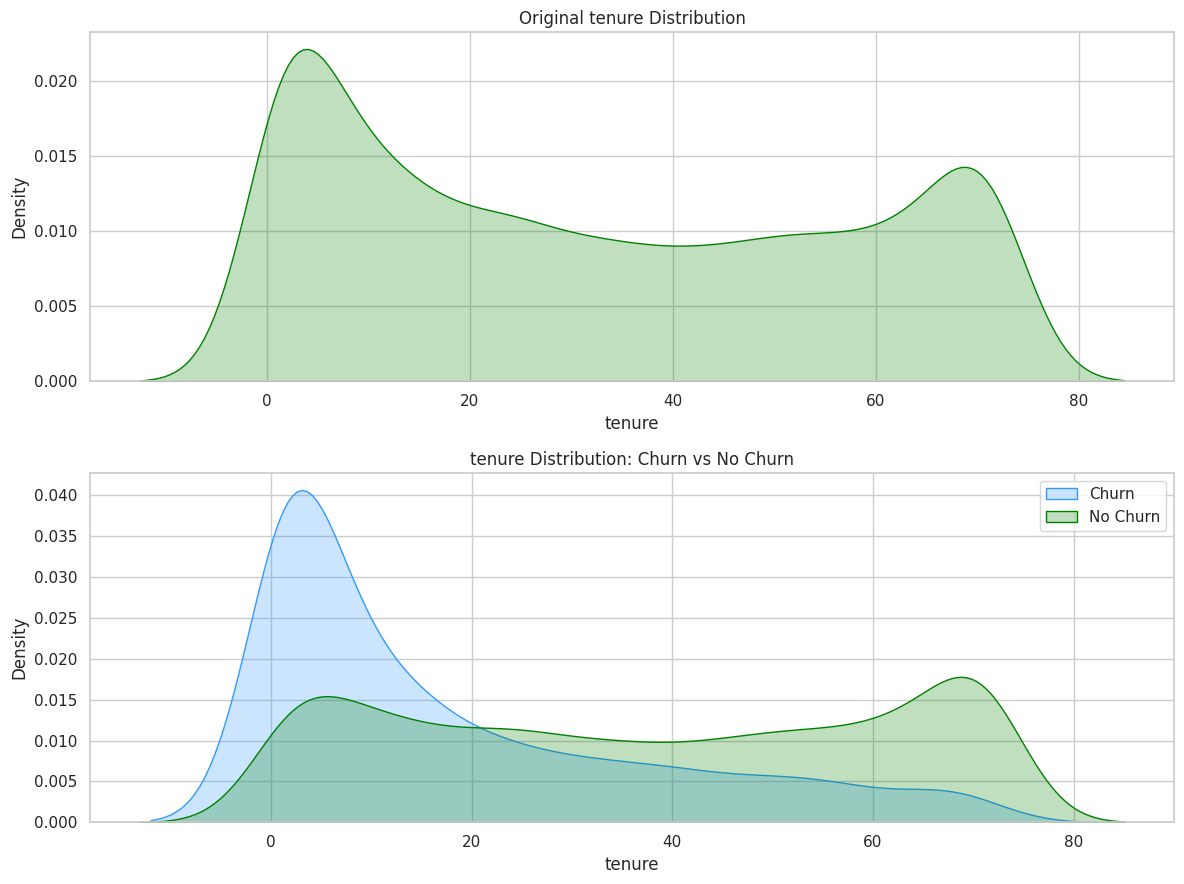

In [ ]:
Numerical_distribution(df_cal,'tenure')

#### MonthlyCharges vs Churn Distribution

/tmp/ipython-input-59-3395063699.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal[feature], color='green', shade=True)
/tmp/ipython-input-59-3395063699.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal.loc[df_cal['Churn'] == 1, feature],
/tmp/ipython-input-59-3395063699.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal.loc[df_cal['Churn'] == 0, feature],


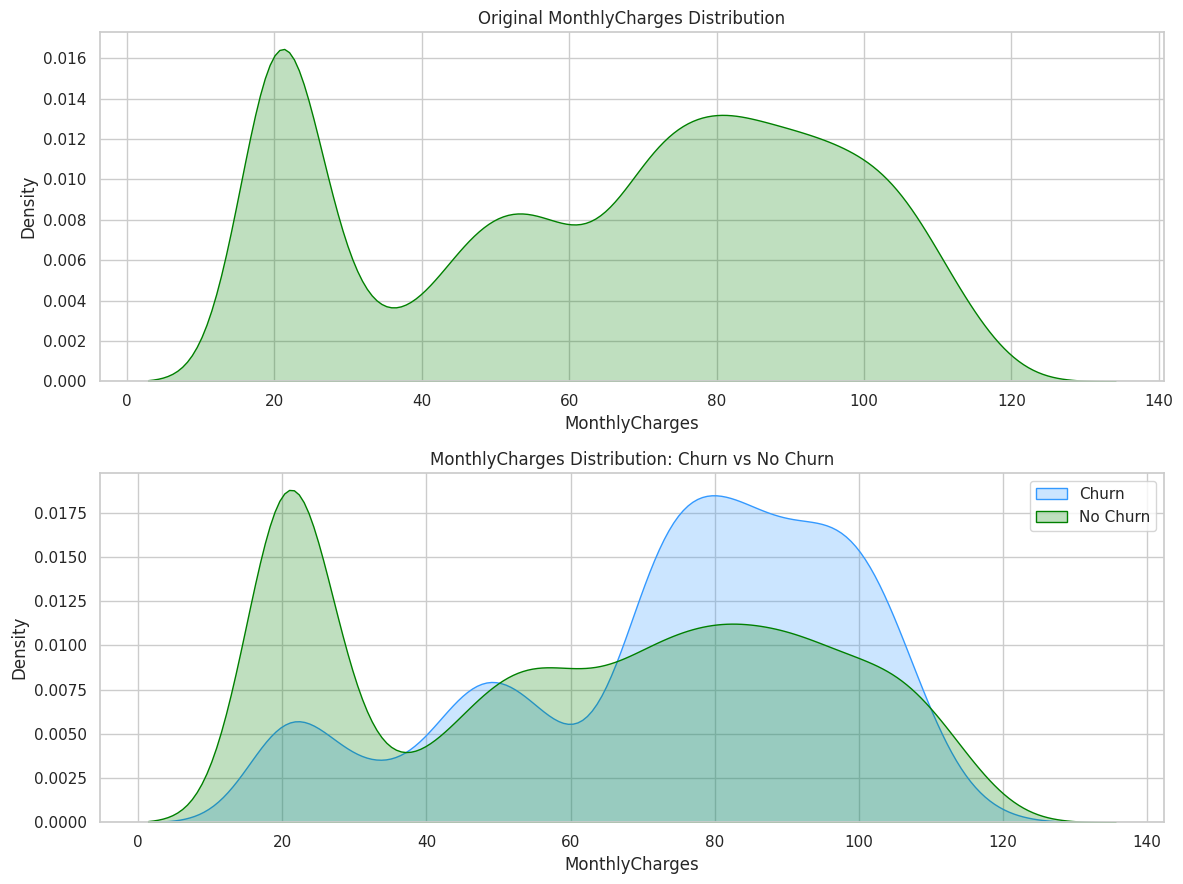

In [ ]:
Numerical_distribution(df_cal,'MonthlyCharges')

#### TotalCharges vs Churn Distribution

/tmp/ipython-input-59-3395063699.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal[feature], color='green', shade=True)
/tmp/ipython-input-59-3395063699.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal.loc[df_cal['Churn'] == 1, feature],
/tmp/ipython-input-59-3395063699.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cal.loc[df_cal['Churn'] == 0, feature],


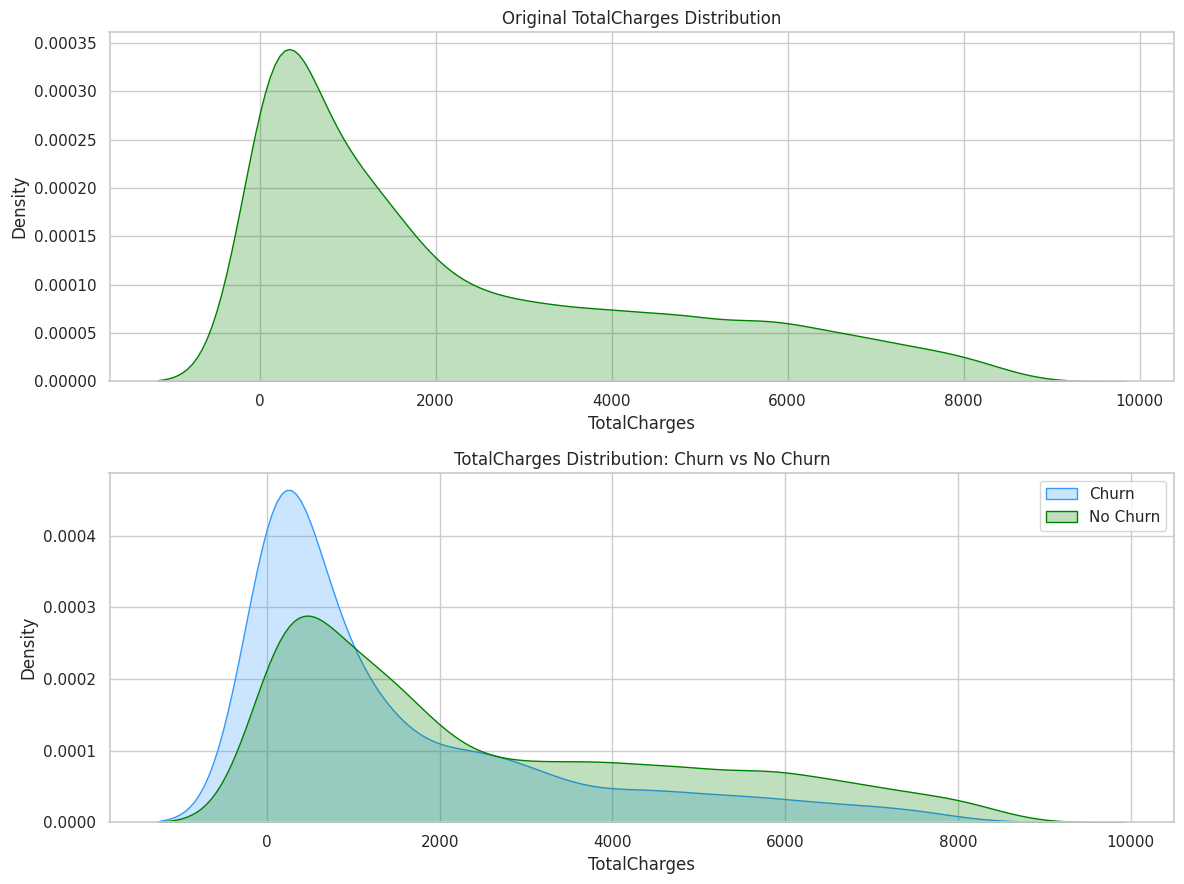

In [ ]:
Numerical_distribution(df_cal, 'TotalCharges')

From above distribution, churn subscribers are
<b>
- more likely to leave company who's tenure is less than a year
- more likely to have more than $65 monthly charges
</b>

## 3. Cluster Analysis
<hr>

Let's check is there any relationship between tenure and MonthlyCharges.

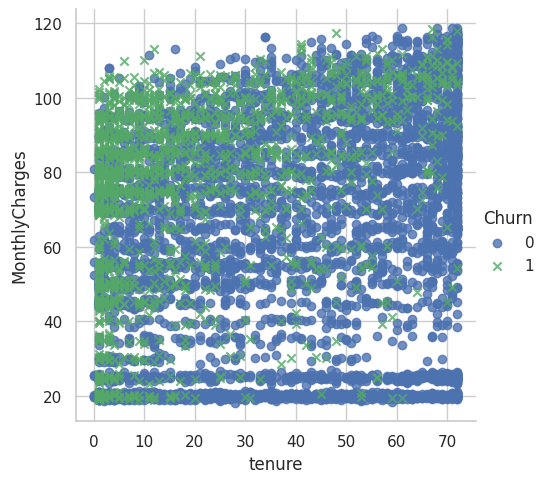

In [ ]:
sns.lmplot(x='tenure'
           ,y='MonthlyCharges'
           ,data=df_cal
           ,hue='Churn'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= plotColor)
plt.show()

**From the analysis, there are some clusters based on tenure and Monthly Charges.**

Let's apply K-means cluster algorithm to see clusters. Before passing data to K-means algo, need to normalize tenure and Monthly Charges.

In [ ]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [ ]:
# normalized tenure and monthlycharges

df_cal['tenure_norm'] = Normalize_feature(df_cal[['tenure']])
df_cal['MonthlyCharges_norm'] = Normalize_feature(df_cal[['MonthlyCharges']])
df_cal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,1,2,29.85,29.85,0,-1.277445,-1.160323
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,0,0,1,0,3,56.95,1889.50,0,0.066327,-0.259629
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,1,3,53.85,108.15,1,-1.236724,-0.362660
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,0,0,1,0,0,42.30,1840.75,0,0.514251,-0.746535
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,70.70,151.65,1,-1.236724,0.197365


From Elbow curve, 3 seems most efficient.

In [ ]:
df_final.shape

(7043, 21)

In [ ]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """

    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   )

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(10,7))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data
                , color=kmean_colors # color of data points
                , alpha=0.75 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )

    plt.title(chart_title,fontsize=15)
    plt.show()

    return kmeans.fit_predict(df_cal[df_cal.Churn==1][[x_title+'_norm', y_title +'_norm']])

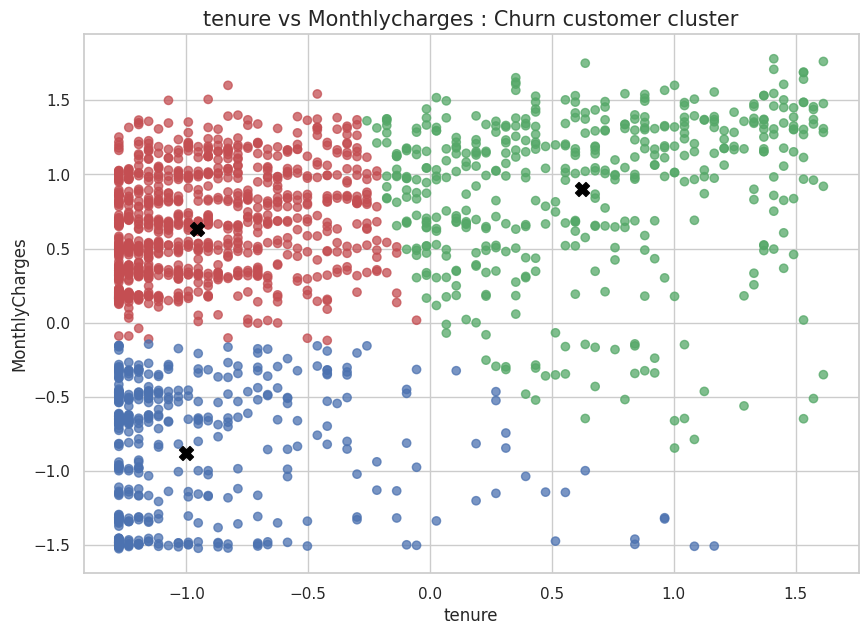

array([-1,  0,  2,  1])

In [ ]:
df_cal['Cluster'] = -1 # by default set Cluster to -1
df_cal.loc[(df_cal.Churn==1),'Cluster'] = Create_kmeans_cluster_graph(df_cal
                            ,df_cal[df_cal.Churn==1][['tenure_norm','MonthlyCharges_norm']]
                            ,3
                           ,'tenure'
                           ,'MonthlyCharges'
                           ,"tenure vs Monthlycharges : Churn customer cluster")

df_cal['Cluster'].unique()

In [ ]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title, color=None):
    """ Based on x and y value, generate bar graph """

    fig, ax = plt.subplots()
    ax.bar(range(len(x)), y, width=0.75, color=color, alpha=0.6)

    plt.xticks(range(len(x)), x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title, fontsize=13)
    plt.ylabel(y_title, fontsize=13)
    plt.grid(False)
    plt.yticks(fontsize=12)
    plt.ylim(top=1)

    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)

    for i, v in enumerate(y):
        ax.text(i, v + 0.05, str(round(v * 100, 2)) + '%', fontsize=13, ha='center')

    plt.show()


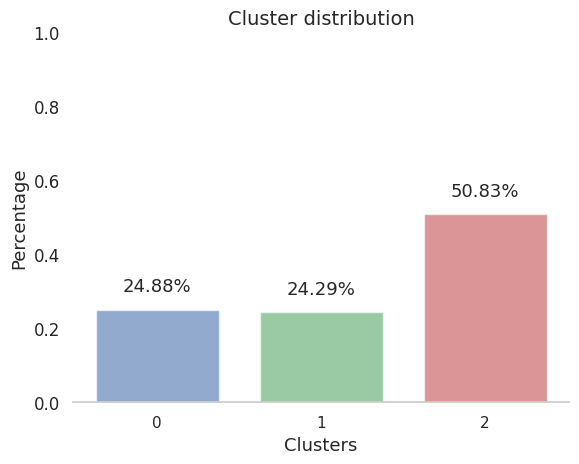

In [ ]:
# Distribution of clusters
churn_distribution =  df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= churn_distribution.index
                   , y = churn_distribution.values
                   , x_title = 'Clusters'
                   , y_title = 'Percentage'
                   , chart_title = 'Cluster distribution'
                  , color = plotColor)

Based on K-means cluster graph, we can see that there are three groups.
1. Low tenure and High Monthly Charges (Green cluster)
2. High tenure and High Monthly Charges (Red cluster)
0. Low tenure and Low Monthly Charges (Blue cluster)

And From distribution graph shows that around 50% of the customers belong to cluster Low tenure and High Monthly Charges.

Let's check there average tenure and Monthly Charges by cluster.

## 4. Churn customer prediction model
<hr>

### Data preprocessing

In [ ]:
  X = df_final.drop(['Churn','customerID'], axis=1).copy()
  y = df_final['Churn'].copy().astype(int)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_target_distribution(y, title="Target Distribution", labels={0: 'No Churn', 1: 'Churn'}):
    """Vẽ bar plot phân bố target với % trên từng cột"""
    counts = pd.Series(y).value_counts(normalize=True).sort_index()

    fig, ax = plt.subplots(figsize=(6, 5))
    bars = sns.barplot(x=counts.index.map(labels), y=counts.values, palette=['#64B5F6','#E57373'])

    # Hiển thị phần trăm trên cột
    for i, v in enumerate(counts.values):
        ax.text(i, v + 0.01, f"{v*100:.1f}%", ha='center', fontsize=12, weight='bold')

    plt.title(title, fontsize=14)
    plt.ylim(0, 1.1)
    plt.ylabel("Tỷ lệ")
    plt.xlabel("Class")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()

#### Train & Test data split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

def preprocess_data(df, cat_cols, nom_cols, num_cols, target_col):
    # Shuffle lại data
    df_model = shuffle(df_model, random_state=42).reset_index(drop=True)

    # One-hot encoding cho cột phân loại (nominal)
    df_model = pd.get_dummies(df_model, columns=nom_cols, drop_first=True)

    # Normalize các cột số
    scaler = MinMaxScaler()
    df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

    # Tách feature và label
    X = df_model.drop(columns=[target_col])
    y = df_model[target_col].values

    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


----------------------------
Feature shape: (7043, 19)
Target shape: (7043,)
Train feature: (5634, 19)
Train target: (5634,)
Test feature: (1409, 19)
Test target: (1409,)
----------------------------


/tmp/ipython-input-95-3313479425.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=counts.index.map(labels), y=counts.values, palette=['#64B5F6','#E57373'])


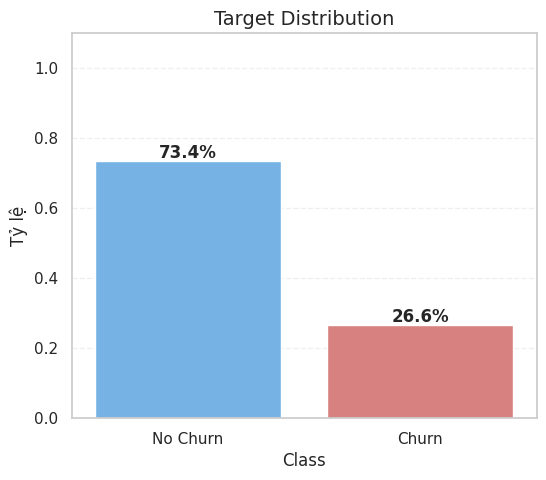

In [ ]:
#X, y = preprocess_data(df_model, cat_cols, nominal_cols, num_cols, target_col)
x_train, x_test, y_train, y_test = split_data(X, y)

# In thông tin kích thước dữ liệu
print("----------------------------")
print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Train feature:", x_train.shape)
print("Train target:", y_train.shape)
print("Test feature:", x_test.shape)
print("Test target:", y_test.shape)
print("----------------------------")
plot_target_distribution(y_train)



#### Upsampling the train data

In [ ]:
from imblearn.over_sampling import SMOTE
SMOTE(sampling_strategy=0.6667)

import numpy as np

def balance_with_smote(X, y, desired_minority_ratio=0.4, random_state=42):
    # Tính tỉ lệ phù hợp với sampling_strategy của SMOTE
    sampling_strategy = desired_minority_ratio / (1 - desired_minority_ratio)

    smote = SMOTE(random_state=random_state, sampling_strategy=sampling_strategy)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # In lại số lượng sau khi SMOTE
    unique, counts = np.unique(y_resampled, return_counts=True)
    print("✅ Class distribution after SMOTE:", dict(zip(unique, counts)))

    return X_resampled, y_resampled


x_train, y_train = balance_with_smote(x_train, y_train, desired_minority_ratio=0.4)




✅ Class distribution after SMOTE: {np.int64(0): np.int64(4138), np.int64(1): np.int64(2758)}


/tmp/ipython-input-74-3313479425.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=counts.index.map(labels), y=counts.values, palette=['#64B5F6','#E57373'])


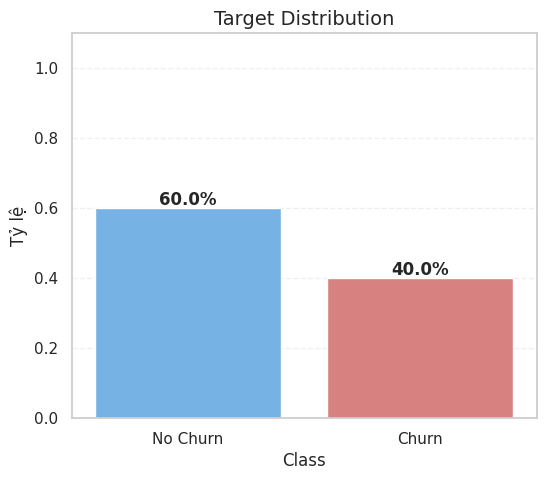

In [ ]:
plot_target_distribution(y_train)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
joblib.dump(scaler, "scaler1.pkl")

['scaler2.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

random_state = 42  # hoặc giữ nguyên biến bạn đang dùng

clsLR = LogisticRegression(
    random_state=random_state,
    C=0.5,
    penalty='l1',
    solver='liblinear'  # cần thiết với 'l1'
)

clsRF = RandomForestClassifier(
    random_state=random_state,
    max_depth=20,
    n_estimators=150,
    max_features='sqrt',
    min_samples_leaf=1
)

clsGB = GradientBoostingClassifier(
    random_state=random_state,
    max_depth=5,
    n_estimators=100,
    learning_rate=0.2,
    min_samples_leaf=10,
    min_samples_split=0.1,
    subsample=1
)
clsModels = [clsLR, clsRF, clsGB]
models = {
    "Logistic Regression": clsLR,
    "Random Forest": clsRF,
    "Gradient Boosting": clsGB
}

In [ ]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,24.80,24.80
2715,1,0,0,0,41,1,1,2,0,0,0,0,0,0,0,1,0,25.25,996.45
3825,0,0,1,1,52,1,0,2,0,0,0,0,0,0,2,0,3,19.35,1031.70
1807,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,2,76.35,76.35
132,1,0,0,0,67,1,0,0,0,0,0,1,0,0,2,0,0,50.55,3260.10



🔹 Model: Logistic Regression
  ✅ Accuracy : 0.7864
  ✅ Precision: 0.5811
  ✅ Recall   : 0.6917
  ✅ AUC      : 0.8489


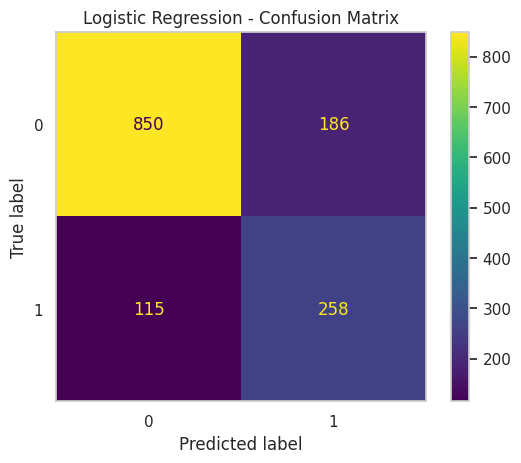

📦 Saved model to: logistic_regression_model.pkl

🔹 Model: Random Forest
  ✅ Accuracy : 0.7793
  ✅ Precision: 0.5820
  ✅ Recall   : 0.5898
  ✅ AUC      : 0.8278


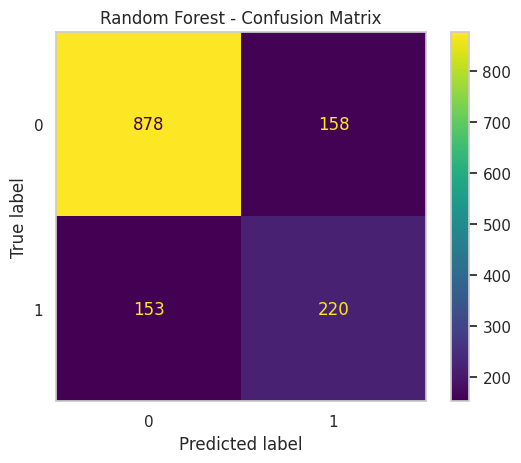

📦 Saved model to: random_forest_model.pkl

🔹 Model: Gradient Boosting
  ✅ Accuracy : 0.7928
  ✅ Precision: 0.6074
  ✅ Recall   : 0.6139
  ✅ AUC      : 0.8396


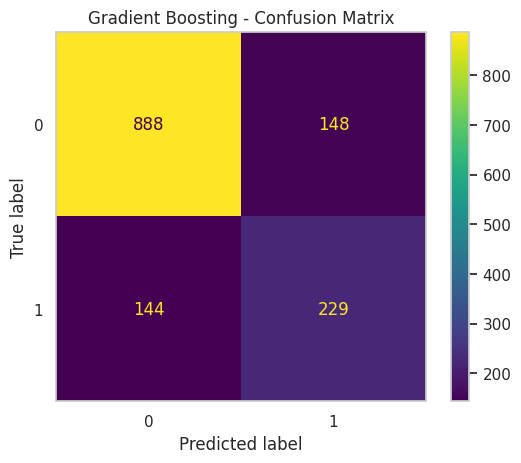

📦 Saved model to: gradient_boosting_model.pkl


In [ ]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

for name, model in models.items():
    print(f"\n🔹 Model: {name}")

    # Train
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]  # lấy xác suất class 1

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"  ✅ Accuracy : {acc:.4f}")
    print(f"  ✅ Precision: {precision:.4f}")
    print(f"  ✅ Recall   : {recall:.4f}")
    print(f"  ✅ AUC      : {auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

    # Save model (only the model itself, no threshold)
    safe_name = name.lower().replace(" ", "_").replace("-", "_")
    joblib.dump(model, f"{safe_name}_model.pkl")
    print(f"📦 Saved model to: {safe_name}_model.pkl")



# Conclusion



In this notebook, I have tried to divide customer churn prediction problem into steps like exploration, profiling, clustering, model selection & evaluation and retention plans. Based on this analysis, we can help retention team to analyze high risk churn customers before they leave the company.

Moreover, we can add different datasources like customer inquires, seasonality in sales, more demographic information to make our prediction accurate.